### Decision Tree Methods - In class practice

In [ ]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
Bank_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bank.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Import the bank dataset

In [ ]:
print(Bank_df.info())
print(Bank_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
   ID  Age  Experience  Income  ZIP Code  Family  C

3. The dependent variable is 'Personal Loan', meaning whether the customer accepts a personal loan offer or not. Take a look at its distribution.

In [ ]:
Bank_df['Personal Loan'] = pd.cut(Bank_df['Personal Loan'], bins = [-1, Bank_df['Personal Loan'].mean(), float('inf')], labels = ['No', 'Yes'])
print(Bank_df['Personal Loan'].value_counts())

Personal Loan
No     4520
Yes     480
Name: count, dtype: int64


4. Prepare X and y

In [ ]:
Bank_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
X = Bank_df.drop(['Personal Loan','ZIP Code','ID'], axis = 1)
y = Bank_df['Personal Loan']
print(X.head())


   Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  


5. Split training and test datasets

6. Fit a decision tree.<br>
We set the max depth to be 3 to stop the tree growing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

7. Plot the tree and print the classification results.<br>
Calculate the accuracy rate and confusion matrix.

In [ ]:
dt_1 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
dt_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

<Figure size 1200x800 with 0 Axes>

[Text(0.4230769230769231, 0.875, 'Income <= 98.5\nentropy = 0.466\nsamples = 3500\nvalue = [3153, 347]'),
 Text(0.15384615384615385, 0.625, 'CCAvg <= 2.95\nentropy = 0.075\nsamples = 2612\nvalue = [2588.0, 24.0]'),
 Text(0.28846153846153844, 0.75, 'True  '),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 2460\nvalue = [2460, 0]'),
 Text(0.23076923076923078, 0.375, 'CCAvg <= 4.2\nentropy = 0.629\nsamples = 152\nvalue = [128, 24]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.725\nsamples = 119\nvalue = [95, 24]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.6923076923076923, 0.625, 'Education <= 1.5\nentropy = 0.946\nsamples = 888\nvalue = [565, 323]'),
 Text(0.5576923076923077, 0.75, '  False'),
 Text(0.5384615384615384, 0.375, 'Family <= 2.5\nentropy = 0.49\nsamples = 544\nvalue = [486, 58]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.039\nsamples = 473\nvalue = [471, 2]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0

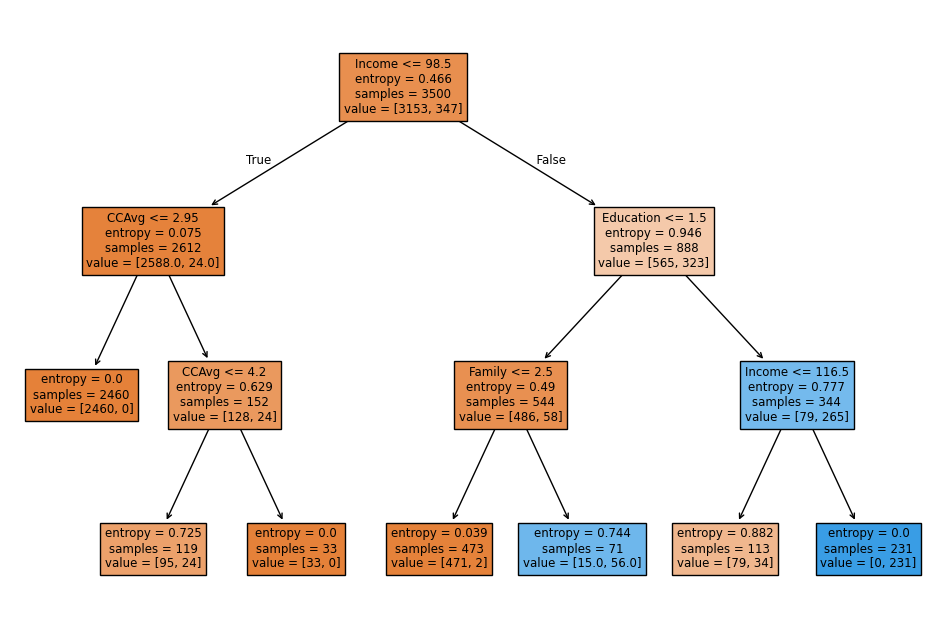

In [ ]:
bank_names = X.columns
plt.figure(figsize=(12, 8))
plot_tree(dt_1, filled=True, feature_names = bank_names)


In [ ]:
print(export_text(dt_1, feature_names=bank_names, show_weights=True))
dt_1_pred = dt_1.predict(X_test)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2460.00, 0.00] class: No
|   |--- CCAvg >  2.95
|   |   |--- CCAvg <= 4.20
|   |   |   |--- weights: [95.00, 24.00] class: No
|   |   |--- CCAvg >  4.20
|   |   |   |--- weights: [33.00, 0.00] class: No
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [471.00, 2.00] class: No
|   |   |--- Family >  2.50
|   |   |   |--- weights: [15.00, 56.00] class: Yes
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [79.00, 34.00] class: No
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 231.00] class: Yes



In [ ]:
accuracy_score(y_test, dt_1_pred)
confusion_matrix(y_test, dt_1_pred)

0.9766666666666667

array([[1362,    5],
       [  30,  103]])

In [ ]:
pd.crosstab(y_test, dt_1_pred, rownames=['True'], colnames=['Predicted'])#, margins=True)

Predicted,No,Yes
True,,
No,1362,5
Yes,30,103


8. Next we fit a tree without specifying stopping criteria.<br>
By default, the tree will grown until there is no more information gain.<br>
Repeat Step 7 for this tree.

In [ ]:
dt_full = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_full.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<Figure size 1200x800 with 0 Axes>

[Text(0.44722222222222224, 0.9705882352941176, 'Income <= 98.5\nentropy = 0.466\nsamples = 3500\nvalue = [3153, 347]'),
 Text(0.22777777777777777, 0.9117647058823529, 'CCAvg <= 2.95\nentropy = 0.075\nsamples = 2612\nvalue = [2588.0, 24.0]'),
 Text(0.3375, 0.9411764705882353, 'True  '),
 Text(0.20555555555555555, 0.8529411764705882, 'entropy = 0.0\nsamples = 2460\nvalue = [2460, 0]'),
 Text(0.25, 0.8529411764705882, 'CCAvg <= 4.2\nentropy = 0.629\nsamples = 152\nvalue = [128, 24]'),
 Text(0.22777777777777777, 0.7941176470588235, 'CD Account <= 0.5\nentropy = 0.725\nsamples = 119\nvalue = [95, 24]'),
 Text(0.20555555555555555, 0.7352941176470589, 'Income <= 82.5\nentropy = 0.633\nsamples = 113\nvalue = [95, 18]'),
 Text(0.13333333333333333, 0.6764705882352942, 'Experience <= 18.5\nentropy = 0.364\nsamples = 72\nvalue = [67, 5]'),
 Text(0.1111111111111111, 0.6176470588235294, 'CCAvg <= 3.55\nentropy = 0.581\nsamples = 36\nvalue = [31, 5]'),
 Text(0.08888888888888889, 0.5588235294117647, '

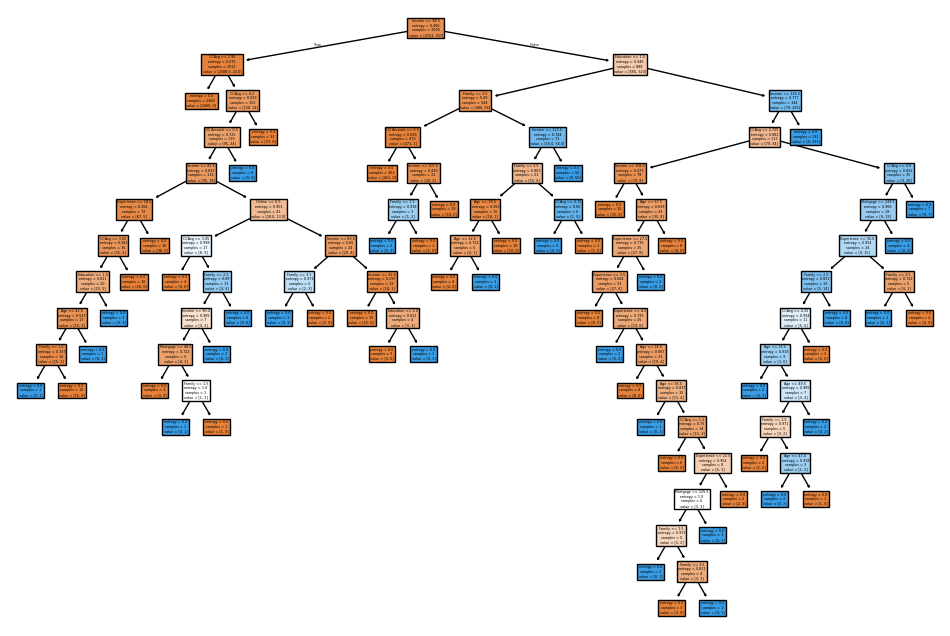

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(dt_full, filled=True, feature_names = bank_names)

In [ ]:
dt_full_pred = dt_full.predict(X_test)
accuracy_score(y_test, dt_full_pred)
confusion_matrix(y_test, dt_full_pred)

0.9866666666666667

array([[1360,    7],
       [  13,  120]])

9. Bagging, random forest and boosting. Repeat Step 7 for all methods.

9.1 Bagging

9.2 Random forest

9.3 Plot the importance of each variable based on the random forest results.

9.4 Boosting. Try manipulate the three parameters to generate three boosting trees. Compare the results.